## 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
shape = 1
sample_size = 1000

gamma_sample = np.random.gamma(shape=shape, size = sample_size)

gamma_sample[:10]

array([0.71854142, 0.77100161, 0.42607075, 0.28930852, 0.06276424,
       0.82930881, 0.58322605, 1.51846721, 1.34892608, 1.88897138])

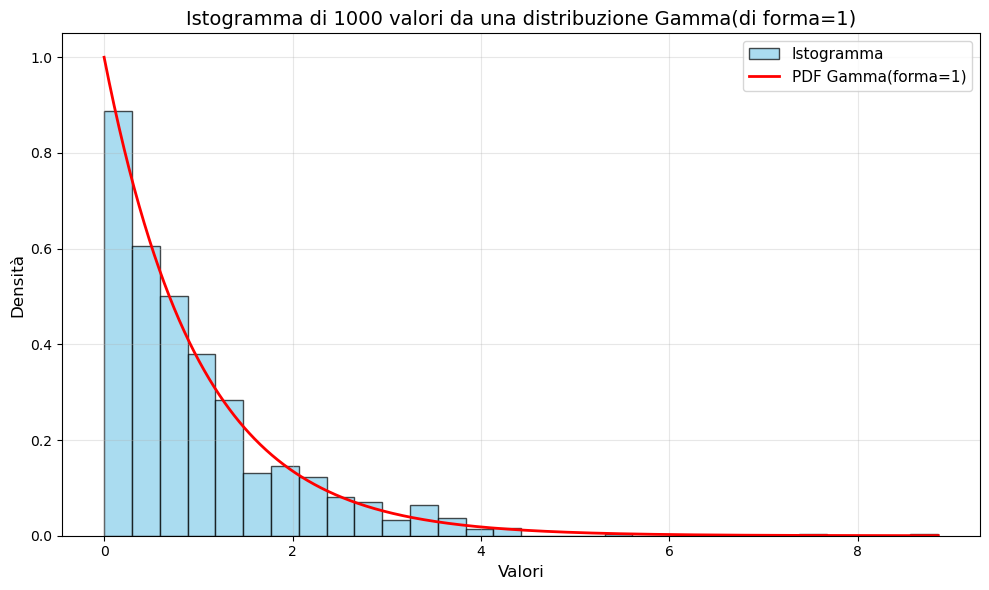

In [11]:
plt.figure(figsize=(10, 6))
hist = plt.hist(gamma_sample, bins=30, density=True, alpha=0.7, 
                color='skyblue', edgecolor='black', label='Istogramma')

x = np.linspace(0, gamma_sample.max(), 1000)
pdf = stats.gamma(a=shape).pdf(x)

plt.plot(x, pdf, 'r-', linewidth=2, label=f'PDF Gamma(forma={shape})')

plt.xlabel('Valori', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.title(f'Istogramma di {sample_size} valori da una distribuzione Gamma(di forma={shape})', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
shape_estimated, loc, scale_estimated = stats.gamma.fit(gamma_sample, floc=0)
print(f"Stima parametri (fit): shape = {shape_estimated:.2f},",
      f"loc = {loc:.2f}, scale = {scale_estimated:.2f}")

Stima parametri (fit): shape = 0.98, loc = 0.00, scale = 1.01


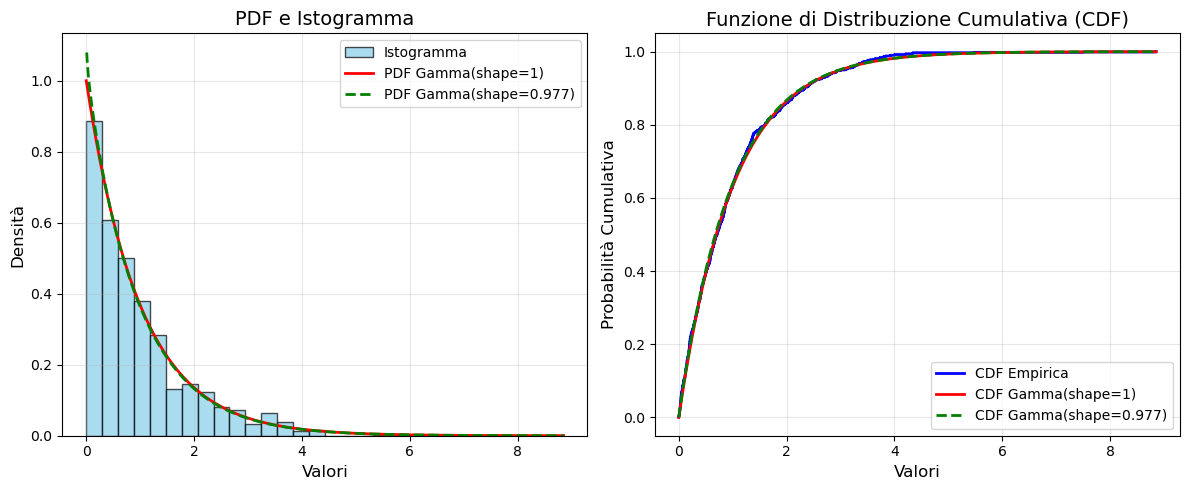

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
hist = plt.hist(gamma_sample, bins=30, density=True, alpha=0.7, 
                color='skyblue', edgecolor='black', label='Istogramma')

x = np.linspace(0, gamma_sample.max(), 1000)
pdf_true = stats.gamma(a=shape).pdf(x)
plt.plot(x, pdf_true, 'r-', linewidth=2, label=f'PDF Gamma(shape={shape})')

pdf_estimated = stats.gamma(a=shape_estimated, scale=scale_estimated).pdf(x)
plt.plot(x, pdf_estimated, 'g--', linewidth=2, 
         label=f'PDF Gamma(shape={shape_estimated:.3f})')

plt.xlabel('Valori', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.title('PDF e Istogramma', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sorted_data = np.sort(gamma_sample)
cdf_empirical = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, cdf_empirical, where='post', 
         linewidth=2, label='CDF Empirica', color='blue')

cdf_true = stats.gamma(a=shape).cdf(x)
plt.plot(x, cdf_true, 'r-', linewidth=2, label=f'CDF Gamma(shape={shape})')

cdf_estimated = stats.gamma(a=shape_estimated, scale=scale_estimated).cdf(x)
plt.plot(x, cdf_estimated, 'g--', linewidth=2, 
         label=f'CDF Gamma(shape={shape_estimated:.3f})')

plt.xlabel('Valori', fontsize=12)
plt.ylabel('Probabilità Cumulativa', fontsize=12)
plt.title('Funzione di Distribuzione Cumulativa (CDF)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
varianza = np.var(gamma_sample, ddof=1)
varianza

0.9489931412557424

## 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Min and max temperature')

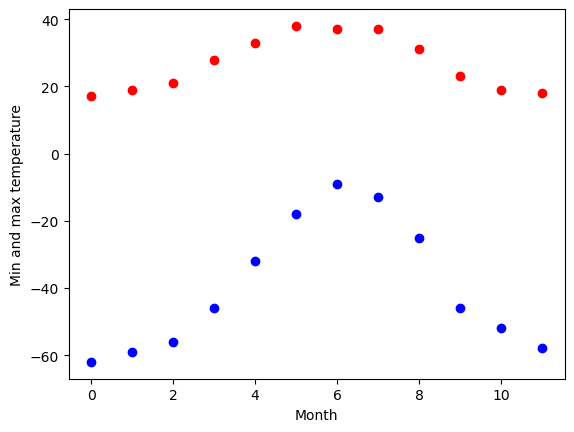

In [24]:
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

MAE Max Temp: 2.57, RMSE: 2.90
MAE Min Temp: 6.36, RMSE: 7.42


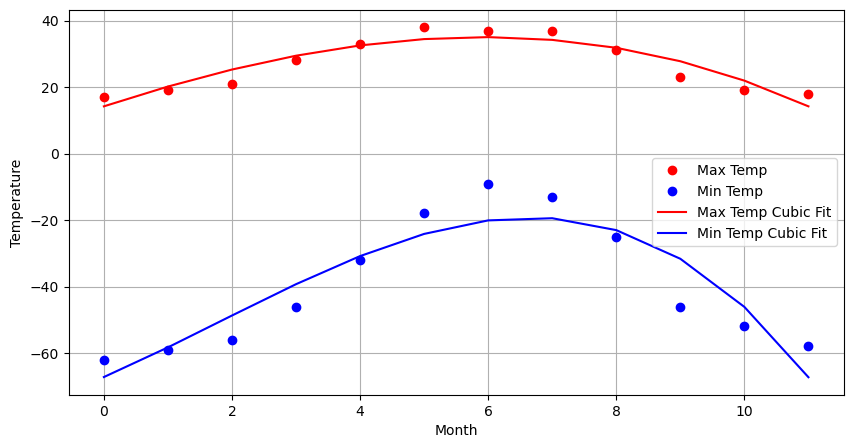

In [25]:
def fit_poly(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    return np.poly1d(coeffs)

def compute_errors(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return mae, rmse

poly3_max = fit_poly(months, temp_max, 3)
poly3_min = fit_poly(months, temp_min, 3)

pred3_max = poly3_max(months)
pred3_min = poly3_min(months)

mae_max, rmse_max = compute_errors(temp_max, pred3_max)
mae_min, rmse_min = compute_errors(temp_min, pred3_min)

print(f"MAE Max Temp: {mae_max:.2f}, RMSE: {rmse_max:.2f}")
print(f"MAE Min Temp: {mae_min:.2f}, RMSE: {rmse_min:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(months, temp_max, "ro", label="Max Temp")
plt.plot(months, temp_min, "bo", label="Min Temp")
plt.plot(months, pred3_max, "r-", label="Max Temp Cubic Fit")
plt.plot(months, pred3_min, "b-", label="Min Temp Cubic Fit")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

## 3

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp
import pandas as pd

In [27]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


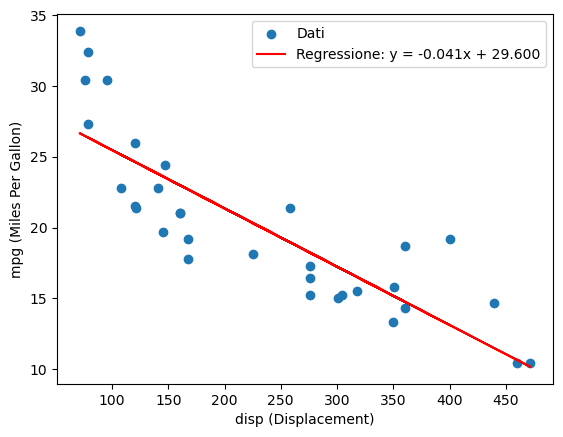

Modello: mpg = -0.0412 * disp + 29.5999
R² = 0.7183


In [40]:
x = df['disp']
y = df['mpg']

def lineare(x, a, b):
    return a * x + b

popt, _ = sp.curve_fit(lineare, x, y)
a, b = popt
y_pred = lineare(x, a, b)

ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - ss_res / ss_tot

plt.scatter(x, y, label='Dati')
plt.plot(x, y_pred, 'r-', label=f'Regressione: y = {a:.3f}x + {b:.3f}')
plt.xlabel('disp (Displacement)')
plt.ylabel('mpg (Miles Per Gallon)')
plt.legend()
plt.show()

print(f"Modello: mpg = {a:.4f} * disp + {b:.4f}")
print(f"R² = {r2:.4f}")